<h1>Project 2 George Stigler

Our populations of interest for this project is food deserts and non-food deserts in the United States. When comparing the average diets between the two types of areas, it is evident that those in non-food deserts are more likely to meet the Recommended Dietary Allowances (RDAs) for various nutrients, whereas those in food deserts might not meet these requirements, leading to nutritional deficiencies or excesses in unhealthy nutrients like saturated fats and added sugars.

Deliverables included in this file:

- Dietary Reference Intakes
- Data on Prices for Different Foods
- Nutritional Content of Food
- Solution - what is the minimum food cost for food deserts across America?

<h2> Basic setup

In [63]:
%pip install eep153_tools
%pip install gnupg
%pip install fooddatacentral
from  scipy.optimize import linprog as lp
import numpy as np
import warnings
import pandas as pd
import fooddatacentral as fdc
import warnings
from eep153_tools.sheets import read_sheets

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [22]:
!pip install -r requirements.txt

In [23]:
apikey = "Z4ehkkMbO1DlcukePiecqfxU55sRATGnDJHItl5B"

<h2>[A0] Dietary Reference Intakes

#### 1. Input dietary nutrition intake requirements from the lecture (based on US government recommendations).

In [44]:
DRI_url = "https://docs.google.com/spreadsheets/d/1y95IsQ4HKspPW3HHDtH7QMtlDA66IUsCHJLutVL-MMc/"
DRIs = read_sheets(DRI_url)

Key available for students@eep153.iam.gserviceaccount.com.


#### 2. Define minimum intakes and maximum intakes and show example  

In [48]:
# Define *minimums*
diet_min = DRIs['diet_minimums'].set_index('Nutrition')

# Define *maximums*
diet_max = DRIs['diet_maximums'].set_index('Nutrition')
diet_min

,Source,C 1-3,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
Nutrition,,,,,,,,,,,,,,
Energy,---,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,RDA,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
"Fiber, total dietary",---,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
"Folate, DFE",RDA,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
"Calcium, Ca",RDA,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0
"Carbohydrate, by difference",RDA,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
"Iron, Fe",RDA,7.0,10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0
"Magnesium, Mg",RDA,80.0,130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0
Niacin,RDA,6.0,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0


<h2>[A1] Minimum Cost of Food (For non-Food Deserts)

#### 1. Input the food list data for non-Food Deserts

In [26]:
SHEETs = [# Stigler's foods, modern prices
          ("https://docs.google.com/spreadsheet/ccc?key=1ObK5N_5aVXzVHE7ZXWBg0kQvPS3k1enRwsUjhytwh5A","Stigler Table B (2022 Prices)"),
         ]

In [27]:
from eep153_tools.sheets import read_sheets
df = read_sheets(SHEETs[0][0])[SHEETs[0][1]]
df

Key available for students@eep153.iam.gserviceaccount.com.


,Food,Quantity,Units,Price,Date,Location,FDC
0,Wheat Flour,80.0,oz,3.79,[2022-2-28],Safeway,2432946
1,Wheat Cereal,16.4,oz,3.49,[2022-2-28],Safeway,2343964
2,Corn Meal,80.0,oz,4.49,[2022-2-28],Safeway,2079814
3,Rolled Oats,42.0,oz,3.99,[2022-2-28],Safeway,2478125
4,Evaporated Milk,12.0,oz,1.99,[2022-2-28],Safeway,1889123
5,Cabbage,1.0,lbs,1.29,[2022-2-28],Safeway,169975
6,Potatoes,1.0,lbs,1.49,[2022-2-28],Safeway,576920
7,Spinach,1.0,oz,0.25,[2022-2-28],Safeway,168462
8,Sweet Potatoes,1.0,lbs,1.99,[2022-2-28],Safeway,2427040
9,Navy Beans,1.0,lbs,3.49,[2022-2-28],Safeway,1859097


#### 2. Find exact nutritional content of food 

In [28]:
D = {}
count = 0
for food in df.Food.tolist():
    try:
        FDC = df.loc[df.Food==food,:].FDC[count]
        count+=1
        D[food] = fdc.nutrients(apikey,FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food,FDC))        

FoodNutrients = pd.DataFrame(D,dtype=float)

In [29]:
# Convert food quantities to FDC units
df['FDC Quantity'] = df[['Quantity','Units']].T.apply(lambda x : fdc.units(x['Quantity'],x['Units']))

# Now may want to filter df by time or place--need to get a unique set of food names.
df['FDC Price'] = df['Price']/df['FDC Quantity']

df.dropna(how='any') # Drop food with any missing data

# To use minimum price observed
Prices = df.groupby('Food',sort=False)['FDC Price'].min()
Prices

/srv/conda/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1990: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


Food
Wheat Flour        0.16711039473613717 / hectogram
Wheat Cereal        0.7506471170977783 / hectogram
Corn Meal          0.19797511144202004 / hectogram
Rolled Oats         0.3351026385210139 / hectogram
Evaporated Milk     0.5849598689972085 / hectogram
Cabbage            0.28439631821849204 / hectogram
Potatoes           0.32848877065546755 / hectogram
Spinach             0.8818490487395102 / hectogram
Sweet Potatoes      0.4387199017479063 / hectogram
Navy Beans          0.7694132950252227 / hectogram
Sugar              0.20888799342017147 / hectogram
Beets              0.28439631821849204 / hectogram
Milk (Whole)       0.13974701569746056 / deciliter
Liver (Beef)        1.3205689504874165 / hectogram
Name: FDC Price, dtype: object

#### 3. Solve the minimum cost problem

In [30]:
# define the function for solving subsistence problem
def solve_subsistence_problem(FoodNutrients,Prices,dietmin,dietmax,max_weight=None,tol=1e-6):
    """Solve Stigler's Subsistence Cost Problem.

    Inputs:
       - FoodNutrients : A pd.DataFrame with rows corresponding to foods, columns to nutrients.
       - Prices : A pd.Series of prices for different foods
       - diet_min : A pd.Series of DRIs, with index corresponding to columns of FoodNutrients,
                    describing minimum intakes.
       - diet_max : A pd.Series of DRIs, with index corresponding to columns of FoodNutrients,
                    describing maximum intakes.
       - max_weight : Maximum weight (in hectograms) allowed for diet.
       - tol : Solution values smaller than this in absolute value treated as zeros.
       
    """
    try: 
        p = Prices.apply(lambda x:x.magnitude)
    except AttributeError:  # Maybe not passing in prices with units?
        warnings.warn("Prices have no units.  BE CAREFUL!  We're assuming prices are per hectogram or deciliter!")
        p = Prices

    p = p.dropna()

    # Compile list that we have both prices and nutritional info for; drop if either missing
    use = p.index.intersection(FoodNutrients.columns)
    p = p[use]

    # Drop nutritional information for foods we don't know the price of,
    # and replace missing nutrients with zeros.
    Aall = FoodNutrients[p.index].fillna(0)

    # Drop rows of A that we don't have constraints for.
    Amin = Aall.loc[Aall.index.intersection(dietmin.index)]
    Amin = Amin.reindex(dietmin.index,axis=0)
    idx = Amin.index.to_frame()
    idx['type'] = 'min'
    #Amin.index = pd.MultiIndex.from_frame(idx)
    #dietmin.index = Amin.index
    
    Amax = Aall.loc[Aall.index.intersection(dietmax.index)]
    Amax = Amax.reindex(dietmax.index,axis=0)
    idx = Amax.index.to_frame()
    idx['type'] = 'max'
    #Amax.index = pd.MultiIndex.from_frame(idx)
    #dietmax.index = Amax.index

    # Minimum requirements involve multiplying constraint by -1 to make <=.
    A = pd.concat([Amin,
                   -Amax])

    b = pd.concat([dietmin,
                   -dietmax]) # Note sign change for max constraints

    # Make sure order of p, A, b are consistent
    A = A.reindex(p.index,axis=1)
    A = A.reindex(b.index,axis=0)

    if max_weight is not None:
        # Add up weights of foods consumed
        A.loc['Hectograms'] = -1
        b.loc['Hectograms'] = -max_weight
        
    # Now solve problem!  (Note that the linear program solver we'll use assumes
    # "less-than-or-equal" constraints.  We can switch back and forth by
    # multiplying $A$ and $b$ by $-1$.)

    result = lp(p, -A, -b, method='highs')

    result.A = A
    result.b = b
    
    if result.success:
        result.diet = pd.Series(result.x,index=p.index)
    else: # No feasible solution?
        warnings.warn(result.message)
        result.diet = pd.Series(result.x,index=p.index)*np.nan  

    return result

#### 4. Use Female aged 19-30 as an example group to show the minimum cost and diet

In [31]:
#Example
group = 'F 19-30'
tol = 1e-6

result = solve_subsistence_problem(FoodNutrients,Prices,diet_min[group],diet_max[group],tol=tol)

print("Cost of diet for %s is $%4.2f per day.\n" % (group,result.fun))

# Put back into nice series
diet = result.diet

print("\nDiet (in 100s of grams or milliliters):")
print(diet[diet >= tol])  # Drop items with quantities less than precision of calculation.
print()

tab = pd.DataFrame({"Outcome":np.abs(result.A).dot(diet),"Recommendation":np.abs(result.b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab)
print()

print("\nConstraining nutrients are:")
excess = tab.diff(axis=1).iloc[:,1]
print(excess.loc[np.abs(excess) < tol*100].index.tolist())

Cost of diet for F 19-30 is $8.18 per day.


Diet (in 100s of grams or milliliters):
Corn Meal       0.173585
Rolled Oats     1.222726
Spinach         7.169427
Sugar           0.114185
Milk (Whole)    4.668610
Liver (Beef)    0.559561
dtype: float64


With the following nutritional outcomes of interest:
                                    Outcome  Recommendation
Nutrition                                                  
Energy                          2000.000000          2000.0
Protein                           64.025554            46.0
Fiber, total dietary              28.000000            28.0
Folate, DFE                     1553.141602           400.0
Calcium, Ca                     1350.505998          1000.0
Carbohydrate, by difference      157.420393           130.0
Iron, Fe                          28.291479            18.0
Magnesium, Mg                    632.480132           310.0
Niacin                            14.000000            14.0
Phosphorus, P                   103

#### 5. Draw a line chart to demonstrate the virations of minimum diet cost as age changes

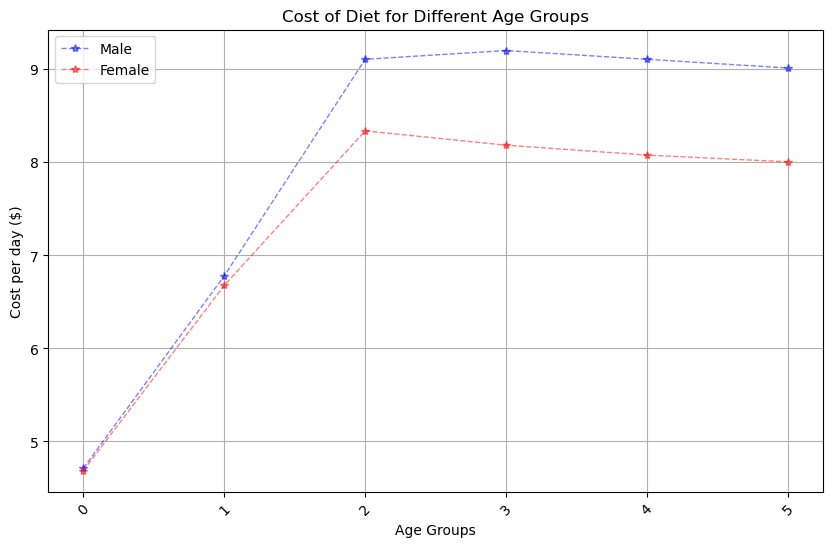

In [32]:
# minimum cost for different age and gender group
import matplotlib.pyplot as plt

def all_groups_results(groupM, groupF, FoodNutrients, Prices, diet_min, diet_max, tol=1e-6):
    resultsM = {}
    resultsF = {}
    
    for group in groupM:
        resultsM[group] = solve_subsistence_problem(FoodNutrients, Prices, diet_min[group], diet_max[group], tol=tol)
    for group in groupF:
        resultsF[group] = solve_subsistence_problem(FoodNutrients, Prices, diet_min[group], diet_max[group], tol=tol)

    # Extract costs for each group
    costsM = {group: result.fun for group, result in resultsM.items()}
    costsF = {group: result.fun for group, result in resultsF.items()}
    
    # Plot costs for male and female groups
    plt.figure(figsize=(10, 6))
    x_values = range(len(groupM))  
    y_values_M = [costsM[group] for group in groupM]  # Male group y-values
    y_values_F = [costsF[group] for group in groupF]  # Female group y-values
    plt.plot(x_values, y_values_M, 'b*--', alpha=0.5, linewidth=1, label='Male')
    plt.plot(x_values, y_values_F, 'r*--', alpha=0.5, linewidth=1, label='Female')

    plt.xticks(x_values, rotation=45)  # Setting x-tick labels
    plt.xlabel('Age Groups')
    plt.ylabel('Cost per day ($)')
    plt.title('Cost of Diet for Different Age Groups')
    plt.legend()
    plt.grid(True)
    plt.show()

    return resultsM, resultsF

# Call the function with your specific groups, FoodNutrients, Prices, diet_min, and diet_max
groupM = ['M 4-8', 'M 9-13', 'M 14-18', 'M 19-30', 'M 31-50', 'M 51+']
groupF = ['F 4-8', 'F 9-13', 'F 14-18', 'F 19-30', 'F 31-50', 'F 51+']
resultsM, resultsF = all_groups_results(groupM, groupF, FoodNutrients, Prices, diet_min, diet_max)

<h2>[A2] Minimum Cost of Food (For Food Deserts, Okland as an example)

#### 1. Input food list we've chosen

In [33]:
####Food desert
df = pd.read_csv('Food Desert items  - Sheet1.csv')
df

,Food,Category,FDC,Quantity,Units,Price,Shelf Life,FD Asscessibility,Location
0,canned corn,Vegetables,748323,14.750000,oz,0.79,2-5 years,High,Pak'N Save
1,Frozen Carrots,Vegetables,746764,12.000000,oz,0.98,2-5 years,High,Pak'N Save
2,Ramen Noodles,Other,171177,3.000000,oz,1.00,Forever,High,Pak'N Save
3,Canned Green Beans,Vegetables,169143,14.500000,oz,1.99,3-5 years,High,Pak'N Save
4,Frozen Broccoli,Vegetables,169968,2.205000,lbs,5.99,1 years,High,Pak'N Save
5,"Candies, milk chocolate",Other,167587,0.418878,lbs,1.39,Forever,High,Pak'N Save
6,Wheat Bread,Grains,172688,1.322770,lbs,2.39,2 weeks or 2-3 months if Forzen,High,Pak'N Save
7,Pasta sauce (Marinara),Other,171192,1.243600,lbs,2.65,1-2 years,High,Pak'N Save
8,White Rice,Grains,168879,2.205000,lbs,2.99,Forever,High,Pak'N Save
9,Canned hotdog(Vienna),Protein,172011,4.600000,oz,1.99,1-2 years,High,Pak'N Save


#### 2. Get nutrition content of food using FDC

In [34]:
D = {}
count = 0
for food in df.Food.tolist():
    try:
        FDC = df.loc[df.Food==food,'FDC'].iloc[0] 
        D[food] = fdc.nutrients(apikey, FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food,FDC))        

FoodNutrients = pd.DataFrame(D,dtype=float)

In [35]:
# Convert food quantities to FDC units
df['FDC Quantity'] = df[['Quantity','Units']].T.apply(lambda x : fdc.units(x['Quantity'],x['Units']))

# Now may want to filter df by time or place--need to get a unique set of food names.
df['FDC Price'] = df['Price']/df['FDC Quantity']

df.dropna(how='any') # Drop food with any missing data

# To use minimum price observed
Prices = df.groupby('Food',sort=False)['FDC Price'].min()
Prices

/srv/conda/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1990: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


Food
canned corn                0.18892494874690524 / hectogram
Frozen Carrots              0.2880706892549067 / hectogram
Ramen Noodles               1.1757987316526803 / hectogram
Canned Green Beans         0.48410471917010356 / hectogram
Frozen Broccoli              0.598897483214248 / hectogram
Candies, milk chocolate     0.7315794680956741 / hectogram
Wheat Bread                 0.3983344093242645 / hectogram
Pasta sauce (Marinara)     0.46978529655027784 / hectogram
White Rice                  0.2989488271804009 / hectogram
Canned hotdog(Vienna)       1.5259822669492396 / hectogram
Canned Tuna                 1.3160354714952098 / hectogram
Spam                        1.9090061128483726 / hectogram
Frozen Pizza                1.4980153712825302 / hectogram
Milk                        0.1874609600562387 / hectogram
Salted Potato Chips         1.3361349223325911 / hectogram
Name: FDC Price, dtype: object

#### 3. Try to solve the minimum cost problem using the function we've defined using the same example group

In [36]:
#Example
group = 'F 19-30'
tol = 1e-6

result = solve_subsistence_problem(FoodNutrients,Prices,diet_min[group],diet_max[group],tol=tol)

print("Cost of diet for %s is $%4.2f per day.\n" % (group,result.fun))

# Put back into nice series
diet = result.diet

print("\nDiet (in 100s of grams or milliliters):")
print(diet[diet >= tol])  # Drop items with quantities less than precision of calculation.
print()

tab = pd.DataFrame({"Outcome":np.abs(result.A).dot(diet),"Recommendation":np.abs(result.b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab)
print()

print("\nConstraining nutrients are:")
excess = tab.diff(axis=1).iloc[:,1]
print(excess.loc[np.abs(excess) < tol*100].index.tolist())

/tmp/ipykernel_71/373023491.py:75: UserWarning: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)
  warnings.warn(result.message)
/tmp/ipykernel_71/373023491.py:76: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result.diet = pd.Series(result.x,index=p.index)*np.nan


TypeError: must be real number, not NoneType

In [37]:
%debug

> /tmp/ipykernel_71/1985800083.py(7)<module>()
      5 result = solve_subsistence_problem(FoodNutrients,Prices,diet_min[group],diet_max[group],tol=tol)
      6 
----> 7 print("Cost of diet for %s is $%4.2f per day.\n" % (group,result.fun))
      8 
      9 # Put back into nice series



ipdb>  result.fun
ipdb>  result


       message: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)
       success: False
        status: 2
           fun: None
             x: None
           nit: 14
         lower:  residual: None
                marginals: None
         upper:  residual: None
                marginals: None
         eqlin:  residual: None
                marginals: None
       ineqlin:  residual: None
                marginals: None
             A:                                 canned corn   Frozen Carrots  Ramen Noodles  \
                Nutrition                                                                     
                Energy                                   0.0         153.000       1841.000   
                Protein                                  0.0           0.810         10.170   
                Fiber, total dietary                     0.0           3.200          2.900   
                Folate, DFE              

ipdb>  exit


## It shows that 'the problem is infeasible' because the food we've chosen doesn't contain all the nutrition necessarily needed, so the function can't give out a possible nutrition-balanced diet. The food we've chosen are so unhealthy :(
## The solution is to add more food to the food list for Food Desert, or check the lacking element and suggest to take dietary supplement like vitamin pills.

In [62]:
failed_nutrition = []

for nutrition in diet_min.index:
    ori = diet_min.loc[nutrition,'F 19-30']
    diet_min.loc[nutrition,'F 19-30'] = 0
    
    result = solve_subsistence_problem(FoodNutrients, Prices, diet_min['F 19-30'], diet_max['F 19-30'], tol=tol)
    if result.fun:
        print("Whoops! Cost of diet without %s for %s is $%4.2f per day.\n" % (nutrition,group,result.fun))
        failed_nutrition.append(nutrition)
    diet_min.loc[nutrition,'F 19-30'] = ori
    
print("failed nutrition:", failed_nutrition)


Whoops!! Cost of diet without Carbohydrate, by difference for F 19-30 is $12.67 per day.

Whoops!! Cost of diet without Potassium, K for F 19-30 is $11.83 per day.

Whoops!! Cost of diet without Vitamin B-12 for F 19-30 is $11.93 per day.

failed nutrition: ['Carbohydrate, by difference', 'Potassium, K', 'Vitamin B-12']


/tmp/ipykernel_71/373023491.py:75: UserWarning: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)
  warnings.warn(result.message)
/tmp/ipykernel_71/373023491.py:76: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result.diet = pd.Series(result.x,index=p.index)*np.nan


## The nutrition we lack is: 
- Carbohydrate, by difference; 
- Potassium, K; 
- Vitamin B-12. 
## We suggest people in food deserts take dietary supplements to make up for a healthy diet when using the food list we provide! 

#### 4. We'll keep working on a healthy food list accessible for food deserts with all the nutrition needed and make comparisons and further analysis.

In [ ]:
# minimum cost for different age and gender group
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def all_groups_results(groupM, groupF, FoodNutrients, Prices, diet_min, diet_max, tol=1e-6):
    resultsM = {}
    resultsF = {}
    
    for group in groupM:
        resultsM[group] = solve_subsistence_problem(FoodNutrients, Prices, diet_min[group], diet_max[group], tol=tol)
    for group in groupF:
        resultsF[group] = solve_subsistence_problem(FoodNutrients, Prices, diet_min[group], diet_max[group], tol=tol)

    # Extract costs for each group
    costsM = {group: result.fun for group, result in resultsM.items()}
    costsF = {group: result.fun for group, result in resultsF.items()}
    
    # Plot costs for male and female groups
    plt.figure(figsize=(10, 6))
    x_values = range(len(groupM))  
    y_values_M = [costsM[group] for group in groupM]  # Male group y-values
    y_values_F = [costsF[group] for group in groupF]  # Female group y-values
    plt.plot(x_values, y_values_M, 'b*--', alpha=0.5, linewidth=1, label='Male')
    plt.plot(x_values, y_values_F, 'r*--', alpha=0.5, linewidth=1, label='Female')

    plt.xticks(x_values, rotation=45)  # Setting x-tick labels
    plt.xlabel('Age Groups')
    plt.ylabel('Cost per day ($)')
    plt.title('Cost of Diet for Different Age Groups')
    plt.legend()
    plt.grid(True)
    plt.show()

    return resultsM, resultsF

# Call the function with your specific groups, FoodNutrients, Prices, diet_min, and diet_max
groupM = ['M 4-8', 'M 9-13', 'M 14-18', 'M 19-30', 'M 31-50', 'M 51+']
groupF = ['F 4-8', 'F 9-13', 'F 14-18', 'F 19-30', 'F 31-50', 'F 51+']
resultsM, resultsF = all_groups_results(groupM, groupF, FoodNutrients, Prices, diet_min, diet_max)